In [1]:
import pandas as pd

df = pd.read_csv('data/processed.csv')

In [4]:
import torch
from engression import engression
from src.simulator import binary_simulator, thresholder

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
x = df['thalach']
y = df['num']

In [22]:
x=torch.tensor(x.values, dtype=torch.float32).view(-1, 1).to(device)
y=torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)

In [26]:
engressor = engression(x, y, lr=0.005, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Batch is larger than half of the sample size. Training based on full-batch gradient descent.
[Epoch 1 (0%)] energy-loss: 0.8546,  E(|Y-Yhat|): 1.0376,  E(|Yhat-Yhat'|): 0.3659
[Epoch 100 (20%)] energy-loss: 0.5055,  E(|Y-Yhat|): 1.0891,  E(|Yhat-Yhat'|): 1.1671
[Epoch 200 (40%)] energy-loss: 0.6190,  E(|Y-Yhat|): 1.2298,  E(|Yhat-Yhat'|): 1.2215
[Epoch 300 (60%)] energy-loss: 0.5389,  E(|Y-Yhat|): 1.0752,  E(|Yhat-Yhat'|): 1.0724
[Epoch 400 (80%)] energy-loss: 0.4886,  E(|Y-Yhat|): 1.0457,  E(|Yhat-Yhat'|): 1.1140
[Epoch 500 (100%)] energy-loss: 0.4899,  E(|Y-Yhat|): 1.0322,  E(|Yhat-Yhat'|): 1.0846

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.2331,  E(|Y-Yhat|): 0.5220,  E(|Yhat-Yhat'|): 0.5778

Prediction-loss E(|Y-Yhat|) and variance-lo

In [28]:
x_min = x.min().item()
x_max = x.max().item()
x_range = (x_min, x_max)
print("Range of x:", x_range)

Range of x: (71.0, 202.0)


In [29]:
x_eval_range = (x_min - 10, x_max + 10)
print("Evaluation range:", x_eval_range)

Evaluation range: (61.0, 212.0)


In [30]:
x_eval = torch.linspace(x_eval_range[0], x_eval_range[1], steps=100).view(-1, 1).to(device)

In [32]:
y_sample = engressor.sample(x_eval, sample_size=1000)

In [34]:
y_prob = (y_sample > 0.5).float().mean(dim=2).squeeze()

In [35]:
import matplotlib.pyplot as plt

(-0.1, 1.1)

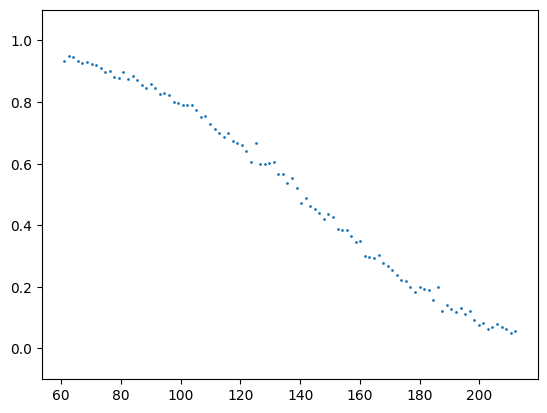

In [36]:
plt.scatter(x_eval.cpu(), y_prob.cpu(), label="predictions", s=1)
plt.ylim(-0.1, 1.1)